In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("customer_behavior_unsupervised.csv")

In [8]:
data

,feature_0,feature_1,feature_2,feature_3,feature_4
0,-1.248325,-1.137174,0.277968,0.702952,1.374166
1,-1.241003,0.720804,0.944749,-1.672147,-0.695038
2,-0.859728,0.955295,0.742522,-1.416056,-0.820891
3,-0.546781,1.198398,0.489929,-1.692133,-0.573161
4,1.091959,0.905112,0.064361,1.088081,-0.892193
...,...,...,...,...,...
495,-1.717106,0.772110,0.117375,-1.134905,-0.795564
496,-0.775524,0.864913,0.670800,-1.384047,-0.524277
497,-1.168657,0.963444,0.422672,-1.461787,-0.579008
498,-0.264773,-1.262000,1.305169,0.567142,1.698487


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  500 non-null    float64
 1   feature_1  500 non-null    float64
 2   feature_2  500 non-null    float64
 3   feature_3  500 non-null    float64
 4   feature_4  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [12]:
#due to the accuracy issue I'll do a heatmap to figure out the feature correlation

<Axes: >

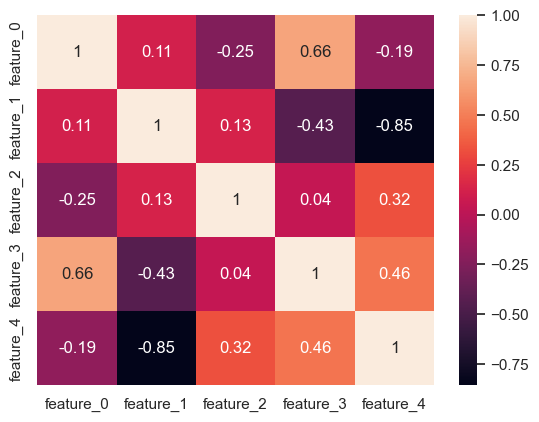

In [14]:
data.corr()
sns.heatmap(data.corr(),cmap='rocket', annot = True)

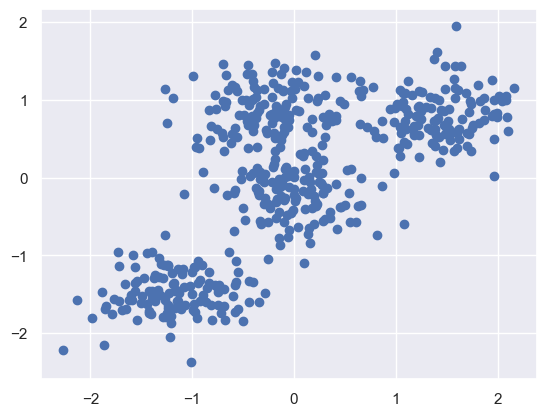

In [15]:
plt.scatter(data.feature_0,data.feature_3)

In [16]:
fixed = data.drop(['feature_1','feature_2','feature_4'],axis=1)
fixed.shape

(500, 2)

In [18]:
#to check if data is standardized
for x in data.columns:
    mean=data[x].mean()
    std=data[x].std()
    print(f'{x} Mean:{mean},std:{std}')

feature_0 Mean:-2.3447910280083307e-16,std:1.0010015025043828
feature_1 Mean:-1.3145040611561853e-16,std:1.001001502504383
feature_2 Mean:5.684341886080802e-16,std:1.0010015025043828
feature_3 Mean:-1.8829382497642654e-16,std:1.0010015025043835
feature_4 Mean:-2.877698079828406e-16,std:1.0010015025043828


In [23]:
from sklearn.preprocessing import StandardScaler 

In [24]:
scaler = StandardScaler()
s_data = scaler.fit_transform(data)

In [27]:
scaler = StandardScaler()
s_data = scaler.fit_transform(fixed)

In [29]:
#when i have more than 2 columns and the scatter plot that work on 2 columns only i will not do the scatter plot to decide the k i will go dirctly to elbow method 

In [31]:
from sklearn.cluster import KMeans

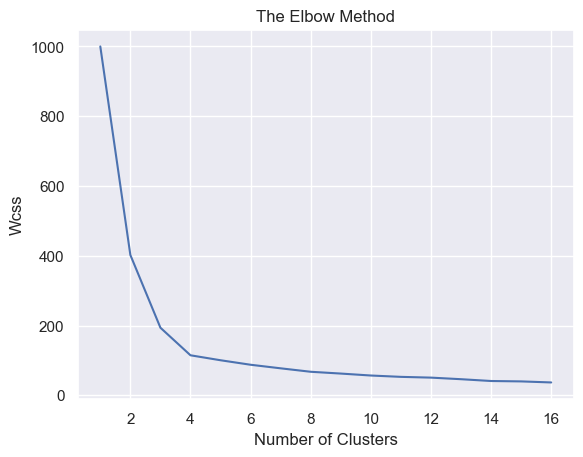

In [32]:
Wcss = []

for i in range(1,17):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state=42)
    kmeans.fit(fixed)
    Wcss.append(kmeans.inertia_)
    
plt.plot(range(1,17),Wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [34]:
#for fixed
kmeans = KMeans(n_clusters = 4, init='k-means++',random_state=42) # we decided to choose 4 clusers based on the elbow method

In [35]:
kmeans.fit_predict(fixed)

array([3, 2, 2, 2, 0, 2, 1, 3, 2, 1, 0, 3, 3, 3, 3, 1, 0, 3, 2, 2, 1, 1,
       2, 2, 1, 0, 3, 0, 1, 1, 2, 3, 2, 2, 1, 0, 0, 3, 0, 3, 0, 1, 3, 0,
       0, 3, 1, 0, 1, 3, 3, 3, 1, 0, 2, 0, 0, 3, 2, 1, 0, 2, 1, 3, 3, 0,
       2, 3, 0, 1, 1, 1, 2, 2, 2, 1, 2, 3, 2, 3, 1, 3, 2, 1, 1, 1, 0, 2,
       0, 1, 2, 0, 0, 3, 3, 0, 0, 2, 2, 3, 3, 2, 0, 2, 3, 3, 3, 3, 0, 1,
       2, 3, 1, 1, 2, 2, 1, 3, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 0, 0, 0, 3, 2, 0, 0, 0, 3, 2, 3, 3, 1, 1, 1, 3, 1, 3,
       1, 1, 2, 3, 0, 2, 0, 2, 3, 1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 3, 2, 3,
       2, 1, 0, 3, 1, 3, 0, 2, 3, 1, 2, 0, 0, 3, 0, 3, 2, 0, 2, 0, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 3, 3, 2, 0, 1, 3, 2, 1, 2, 2, 0, 0, 3, 2, 2,
       0, 2, 2, 0, 1, 0, 2, 1, 3, 2, 2, 0, 0, 3, 0, 0, 0, 2, 2, 1, 2, 2,
       3, 0, 1, 3, 0, 1, 0, 0, 1, 3, 1, 2, 2, 2, 3, 0, 2, 3, 1, 2, 1, 2,
       2, 3, 0, 3, 0, 1, 1, 2, 3, 1, 3, 2, 2, 1, 0, 0, 0, 2, 1, 3, 2, 1,
       0, 2, 3, 2, 2, 3, 1, 2, 2, 0, 3, 3, 1, 1, 3,

In [36]:

labels_f = kmeans.fit_predict(fixed)


In [37]:
fixed["Target"] = labels_f #changed to fixed targets


In [43]:
fixed

,feature_0,feature_3,Target
0,-1.248325,0.702952,3
1,-1.241003,-1.672147,2
2,-0.859728,-1.416056,2
3,-0.546781,-1.692133,2
4,1.091959,1.088081,0
...,...,...,...
495,-1.717106,-1.134905,2
496,-0.775524,-1.384047,2
497,-1.168657,-1.461787,2
498,-0.264773,0.567142,3


In [45]:
data

,feature_0,feature_1,feature_2,feature_3,feature_4
0,-1.248325,-1.137174,0.277968,0.702952,1.374166
1,-1.241003,0.720804,0.944749,-1.672147,-0.695038
2,-0.859728,0.955295,0.742522,-1.416056,-0.820891
3,-0.546781,1.198398,0.489929,-1.692133,-0.573161
4,1.091959,0.905112,0.064361,1.088081,-0.892193
...,...,...,...,...,...
495,-1.717106,0.772110,0.117375,-1.134905,-0.795564
496,-0.775524,0.864913,0.670800,-1.384047,-0.524277
497,-1.168657,0.963444,0.422672,-1.461787,-0.579008
498,-0.264773,-1.262000,1.305169,0.567142,1.698487


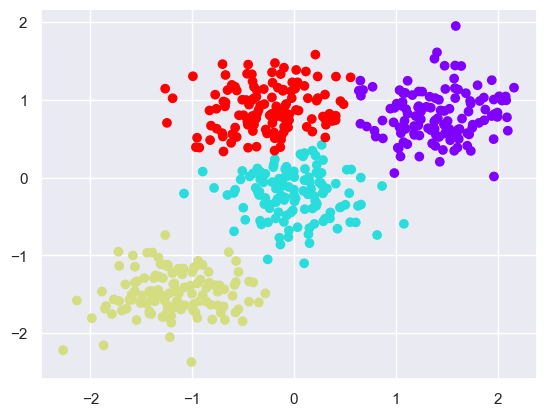

In [47]:
plt.scatter(data.feature_0,data.feature_3,c=labels_f, cmap='rainbow')

In [48]:
#switched to fixed i.e feature 0 and 3 
X=fixed.iloc[:,:3].values #if the limit of columns was higher than the columns available in the dataset it repeats the columns i.e resampling :)
y=fixed.iloc[:,-1].values

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [57]:
y_pred = classifier.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[25  0  0  0]
 [ 2 24  0  0]
 [ 0  0 25  0]
 [ 0  0  0 24]]


0.98

In [67]:
# Predicting the spending

In [69]:
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression()

In [73]:
model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(X_test)

In [77]:
y_pred

array([ 2.00000000e+00,  2.00000000e+00,  3.00000000e+00,  1.00000000e+00,
        2.00000000e+00,  1.00000000e+00,  1.00000000e+00,  3.00000000e+00,
        2.00000000e+00,  3.00000000e+00,  2.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  2.00000000e+00,  2.00000000e+00,  1.00000000e+00,
        2.00000000e+00,  1.00000000e+00,  1.00000000e+00,  3.00000000e+00,
        3.00000000e+00,  8.88178420e-16,  2.00000000e+00,  8.88178420e-16,
        3.00000000e+00,  1.00000000e+00,  1.00000000e+00,  2.22044605e-16,
        4.44089210e-16,  3.00000000e+00,  1.00000000e+00,  2.00000000e+00,
        2.22044605e-16,  3.00000000e+00,  2.22044605e-16,  2.00000000e+00,
        4.44089210e-16,  4.44089210e-16,  3.00000000e+00,  2.00000000e+00,
        6.66133815e-16,  1.00000000e+00,  3.00000000e+00,  2.00000000e+00,
        2.00000000e+00,  2.00000000e+00,  2.00000000e+00,  1.00000000e+00,
        6.66133815e-16,  6.66133815e-16,  1.00000000e+00,  2.00000000e+00,
        6.66133815e-16,  

In [79]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

1.0


In [81]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

3.9299386013053843e-16
